# Prem Hyp attention distribution

In [1]:
import os
import pickle
from tabulate import tabulate
from scipy.stats import ttest_ind
import numpy as np

cwd = os.getcwd().split(os.path.sep)
while cwd[-1] != "stage_4_gm":
    os.chdir("..")
    cwd = os.getcwd().split(os.path.sep)
dir = os.path.join(".cache", "plots", "cls_study")
with open(os.path.join(dir, "attention_prem_hyp.pickle"), "rb") as f:
    attention = pickle.load(f)

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from attention_algorithms.attention_metrics import plot_color_from_ax, default_plot_colormap

## Visualisation of the maps

In [3]:
%%capture
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
plot_color_from_ax(attention["entailement"].mean(axis=-1), axes[0],
                   ylabel="layer",
                   xlabel="",
                   xstick=["premise", "hypothesis"],
                   title = "Entailement")

plot_color_from_ax(attention["neutral"].mean(axis=-1), axes[1],
                   ylabel="layer",
                   xlabel="",
                   xstick=["premise", "hypothesis"],
                   title = "Neutral")

plot_color_from_ax(attention["contradiction"].mean(axis=-1), axes[2],
                   ylabel="layer",
                   xlabel="",
                   xstick=["premise", "hypothesis"],
                   title = "Contradiction")


fig.savefig(os.path.join(os.getcwd(),".cache", "plots", "cls_study", "prem_hyp_attention_study.png"))

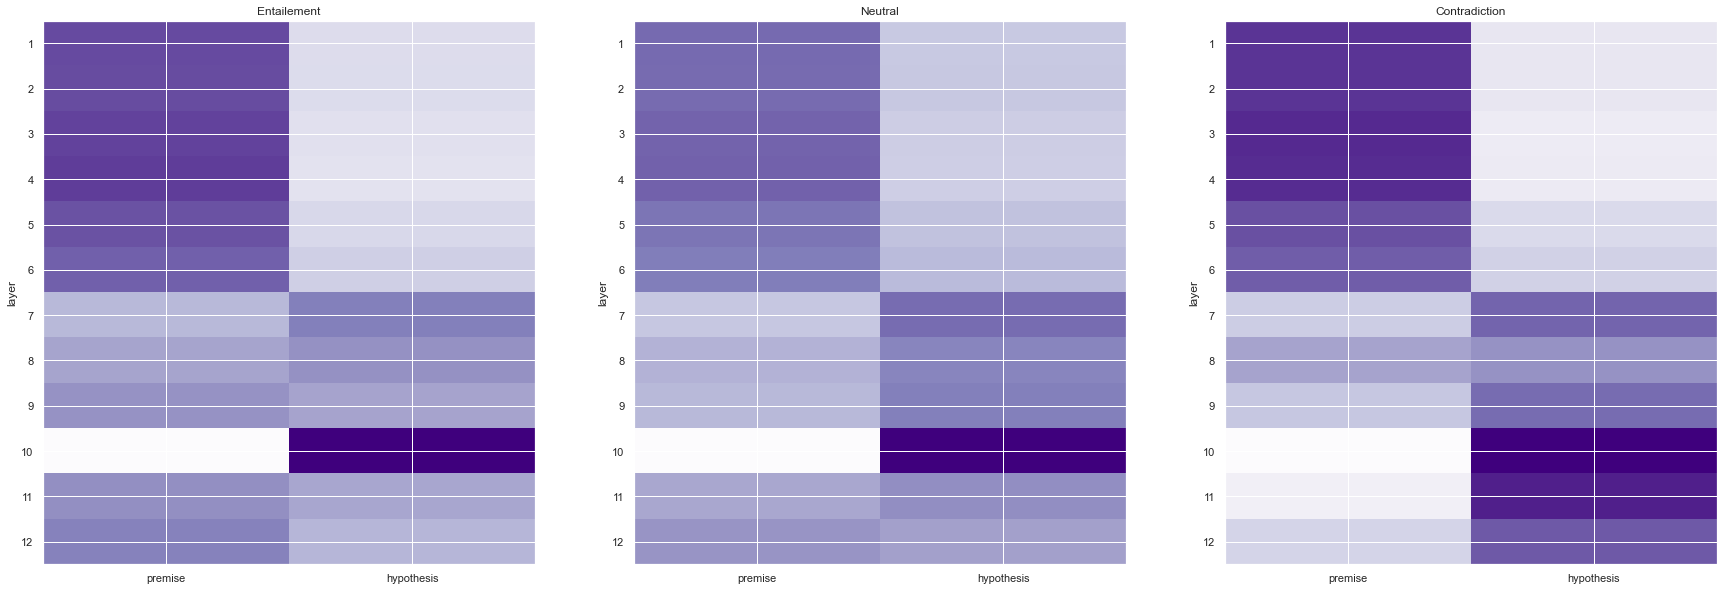

In [4]:
fig

évaluation des p_value pour avoir une idée des p_value entre les différents 

## The different tests

creation of the table for the test

In [5]:
def p_value_signifiance(p):
    if p <= 0.001:
        return "* * *"
    elif p <= 0.01:
        return "* *"
    elif p <= 0.05:
        return "*"
    else :
        return "."


def create_table(test_label):
    table = [["Layer","T-Stats", "p-value", "signifiance"]]
    for i in range(12):
        row = [f"Layer {i+1}",
               np.round(test_label[0][i], 3), 
               np.round(test_label[1][i], 3), 
               p_value_signifiance(test_label[1][i])]
        table.append(row)
        
    return table

In [6]:
test_entailement = ttest_ind(attention["entailement"][:,0,:], attention["entailement"][:,1,:], axis=-1)
test_neutral = ttest_ind(attention["neutral"][:,0,:], attention["neutral"][:,1,:], axis=-1)
test_contradiction = ttest_ind(attention["contradiction"][:,0,:], attention["contradiction"][:,1,:], axis=-1)

In [7]:
print(tabulate(create_table(test_entailement), headers="firstrow"))
print()
print(tabulate(create_table(test_neutral), headers="firstrow"))
print()
print(tabulate(create_table(test_contradiction), headers="firstrow"))

Layer       T-Stats    p-value  signifiance
--------  ---------  ---------  -------------
Layer 1     113.127          0  * * *
Layer 2     121.273          0  * * *
Layer 3     139.454          0  * * *
Layer 4     150.125          0  * * *
Layer 5     117.447          0  * * *
Layer 6      94.09           0  * * *
Layer 7     -45.694          0  * * *
Layer 8     -15.621          0  * * *
Layer 9      11.206          0  * * *
Layer 10   -175.879          0  * * *
Layer 11     11.042          0  * * *
Layer 12     35.681          0  * * *

Layer       T-Stats    p-value  signifiance
--------  ---------  ---------  -------------
Layer 1      52.287          0  * * *
Layer 2      53.19           0  * * *
Layer 3      60.833          0  * * *
Layer 4      62.781          0  * * *
Layer 5      45.98           0  * * *
Layer 6      37.118          0  * * *
Layer 7     -52.713          0  * * *
Layer 8     -27.813          0  * * *
Layer 9     -32.525          0  * * *
Layer 10   -141.351  

il y a donc bien des différences significatives entre les différentes parties de la phrases peu import la couche et peu import le label
- pour la label contradiction on a une forte concentration sur l'hypothèse à partir de la couche 12

## Entropy on the prem and the hyp